# Simple Linear Regression (Price Monitoring Prediction)

Penjelasan Kolom:
- Date = Waktu Pengambilan Data
- Last = Crawling Waktu Update Data
- SKU = Name ID Produk
- Product Name = Nama Produk (Title) yang tertera di Ecommerce
- URL Product = URL produk di ECommerce
- Seller = Nama Toko
- Merchant = Nama E Commerce
- Stock Status = Ketersediaan barang
- Item Condition = Baru / Bekas
- Filter = Apakah Harga diatas bottom price ?
- Flag = Keterangan Tambahan
- Bottom Price = Harga Grosir (Beli dari Pabrik)
- Original Price = Harga yang di set oleh toko di awal penjualan
- Discount = Besaran diskon yang diberikan
- Selling Price = Harga Penjualan setelah diberikan diskon
- Discrepancy = Perbedaan harga
- Sales Quantity = Jumlah barang terjual
- Sales Revenue = Jumlah pendapatan dari barang terjual

## A. Data Preparation

### A.1 Import Libraries

In [131]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set(style='darkgrid', font_scale=1.1)

### A.2 Load Data

In [132]:
try:
    df = pd.read_excel('Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table (1).xlsx')
    print("Berhasil membaca excel")
except Exception as e:
    print("Gagal membaca data")

Berhasil membaca excel


### A.3 Melihat 5 Data Teratas dan 5 Data Terbawah

In [133]:
df.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,2022-10-22,2022-10-22,TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,2022-10-22,2022-10-22,TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,2022-10-22,2022-10-22,TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,2022-10-22,2022-10-22,TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,2022-10-22,2022-10-22,TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [134]:
df.head()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,2022-10-22,2022-10-22,TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,2022-10-22,2022-10-22,TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,2022-10-22,2022-10-22,TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,2022-10-22,2022-10-22,TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,2022-10-22,2022-10-22,TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [135]:
df.tail()

,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
32767,2022-09-20,2022-09-20,TL WR840N,KODE CVUSM02 TP-LINK TL-WR840N 300MBps Wireles...,https://tokopedia.com/cvunggulsidomukti/kode-c...,CV Unggul Sido Mukti,tokopedia,In Stock,baru,Above,Please Check,155000,244000,0,244000,0.015742,0,0
32768,2022-09-20,2022-09-20,TL WR840N,WIRELESS ROUTER TP-LINK TL-WR840N 300Mbps,https://tokopedia.com/carlton279/wireless-rout...,carlton279,tokopedia,In Stock,baru,Above,Please Check,155000,212000,0,212000,0.013677,0,0
32769,2022-09-20,2022-09-20,TL WR840N,TP-LINK TL-WR840N 300Mbps Wireless Router / Wi...,https://tokopedia.com/forgotenstore/tp-link-tl...,Forgoten Store,tokopedia,In Stock,baru,Above,Please Check,155000,271733,0,271733,0.017531,0,0
32770,2022-09-20,2022-09-20,TL WR840N,WIRELESS ROUTER TP-LINK TL-WR840N 300Mbps,https://tokopedia.com/sani1/wireless-router-tp...,Sani1_Shop,tokopedia,In Stock,baru,Above,Please Check,155000,210000,0,210000,0.013548,0,0
32771,2022-09-20,2022-09-20,TL WR840N,Router Tp-Link Wifi Wireless 300Mbps - Tl-Wr840N,https://tokopedia.com/plum-stores/router-tp-li...,PLUM store&#39;s,tokopedia,In Stock,baru,Above,Please Check,155000,274900,0,274900,0.017735,0,0


### A.4 Melihat Informasi Data

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32772 entries, 0 to 32771
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32772 non-null  datetime64[ns]
 1   Last Crawling   32772 non-null  datetime64[ns]
 2   SKU Name        32772 non-null  object        
 3   Product Name    32772 non-null  object        
 4   Url Product     32772 non-null  object        
 5   Seller          32772 non-null  object        
 6   Merchant        32772 non-null  object        
 7   Stock           32772 non-null  object        
 8   Item Condition  32772 non-null  object        
 9   Filter          32772 non-null  object        
 10  Flag            32772 non-null  object        
 11  Bottom Price    32772 non-null  int64         
 12  Original Price  32772 non-null  object        
 13  Discount        32772 non-null  object        
 14  Selling Price   32772 non-null  int64         
 15  Di

### A.5 Melihat Dimensi Data

In [137]:
df.shape

(32772, 18)

### A.6 Cek Data Duplikat

In [138]:
df.duplicated().sum()

np.int64(0)

### A.7 Cek Data Hilang

In [139]:
df.isnull().sum()

Date              0
Last Crawling     0
SKU Name          0
Product Name      0
Url Product       0
Seller            0
Merchant          0
Stock             0
Item Condition    0
Filter            0
Flag              0
Bottom Price      0
Original Price    0
Discount          0
Selling Price     0
Discrepancy       0
Sales Quantity    0
Sales Revenue     0
dtype: int64

### A.8 Cek Outliers

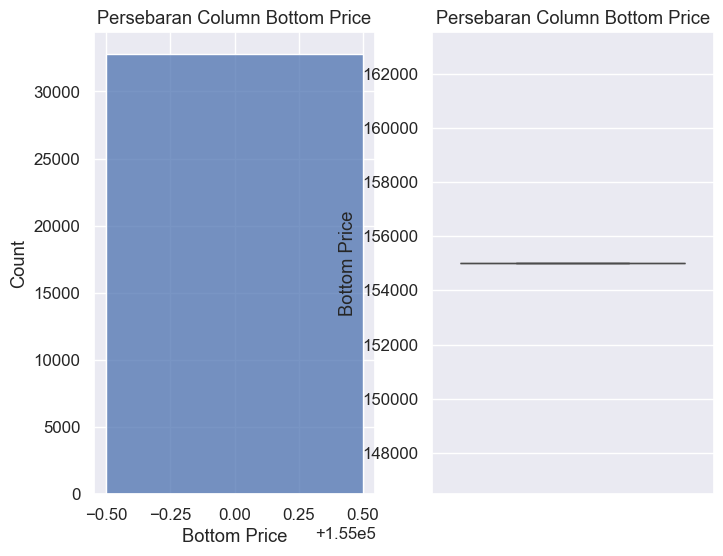

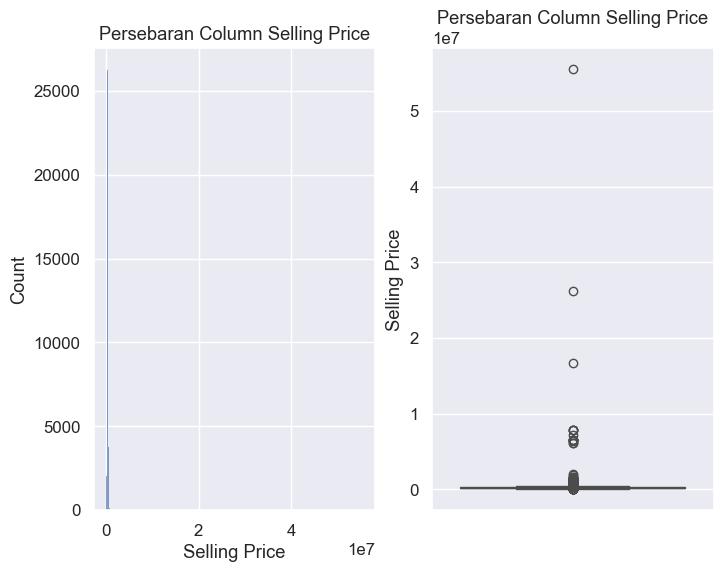

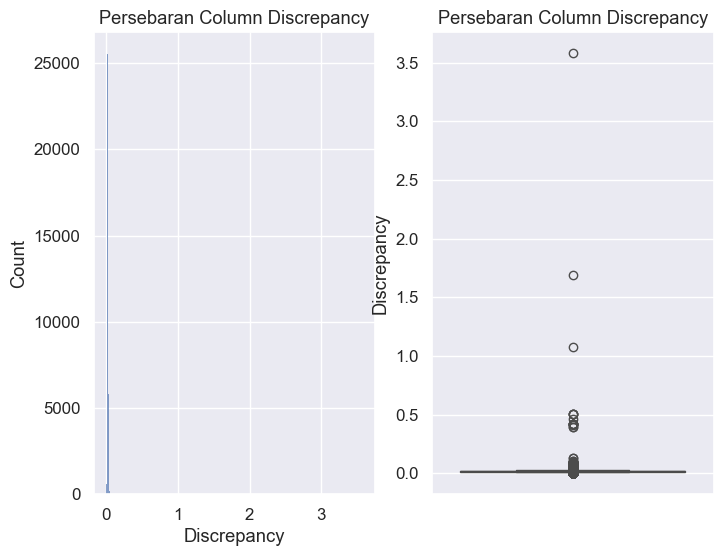

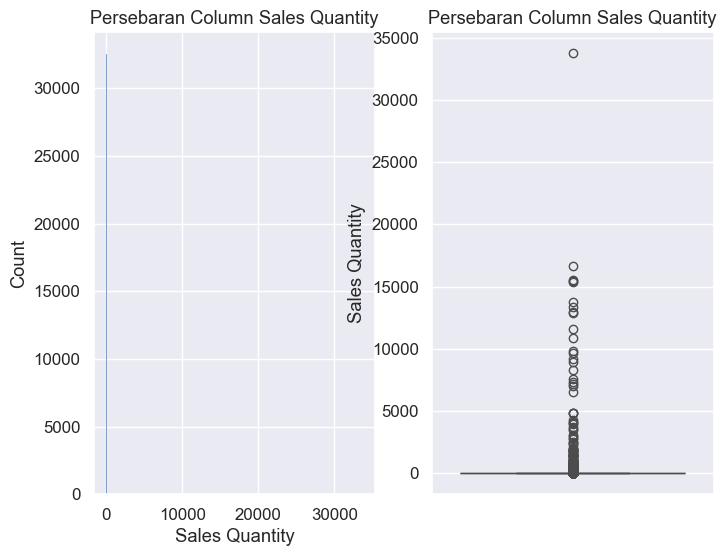

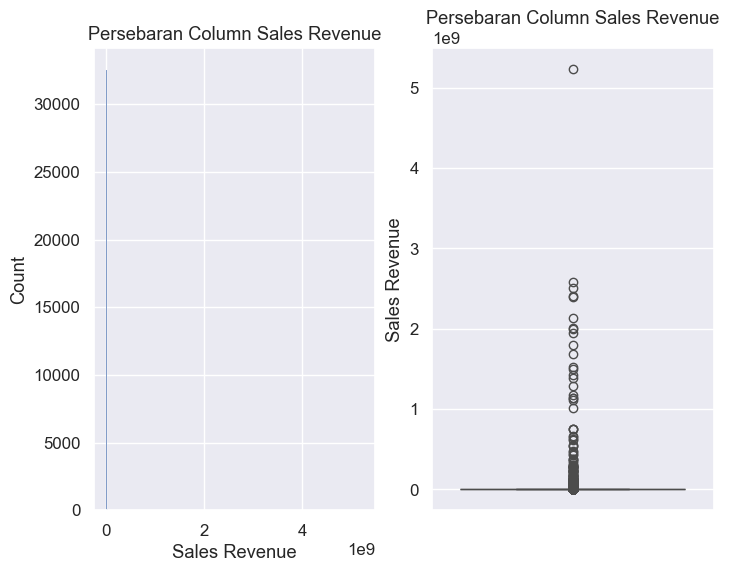

In [140]:
for col in df.select_dtypes(include='number'):
    fig, axes = plt.subplots(1, 2, figsize=(8,6))
    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f"Persebaran Column {col}")
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Column {col}")
    
    plt.show()

In [141]:
df.describe()

,Date,Last Crawling,Bottom Price,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
count,32772,32772,32772.0,3.277200e+04,32772.000000,32772.000000,3.277200e+04
mean,2022-09-25 19:58:06.634932224,2022-09-25 19:58:06.634932224,155000.0,2.682624e+05,0.017166,13.306603,2.082037e+06
min,2022-09-20 00:00:00,2022-09-20 00:00:00,155000.0,2.500000e+04,0.000000,0.000000,0.000000e+00
25%,2022-09-20 00:00:00,2022-09-20 00:00:00,155000.0,2.140000e+05,0.013806,0.000000,0.000000e+00
50%,2022-09-20 00:00:00,2022-09-20 00:00:00,155000.0,2.420000e+05,0.015613,0.000000,0.000000e+00
75%,2022-09-29 00:00:00,2022-09-29 00:00:00,155000.0,2.870000e+05,0.018516,0.000000,0.000000e+00
max,2022-10-22 00:00:00,2022-10-22 00:00:00,155000.0,5.550000e+07,3.580645,33740.000000,5.229700e+09
std,NaN,NaN,0.0,3.857990e+05,0.024959,353.210553,5.482303e+07


## B. Preprocessing

### B.1 Handling Outlier (Tidak Di-handling karena mengurangi akurasi model)

In [142]:
#df_clean = df.copy()

In [143]:
# df['Discrepancy'] = df['Discrepancy'].clip(0.0, 0.5)

In [144]:
# df['Selling Price'] = df['Selling Price'].clip(150000, 1000000)

## C. Exploratory Data Analysis (EDA)

### C.1 Univariate Analysis

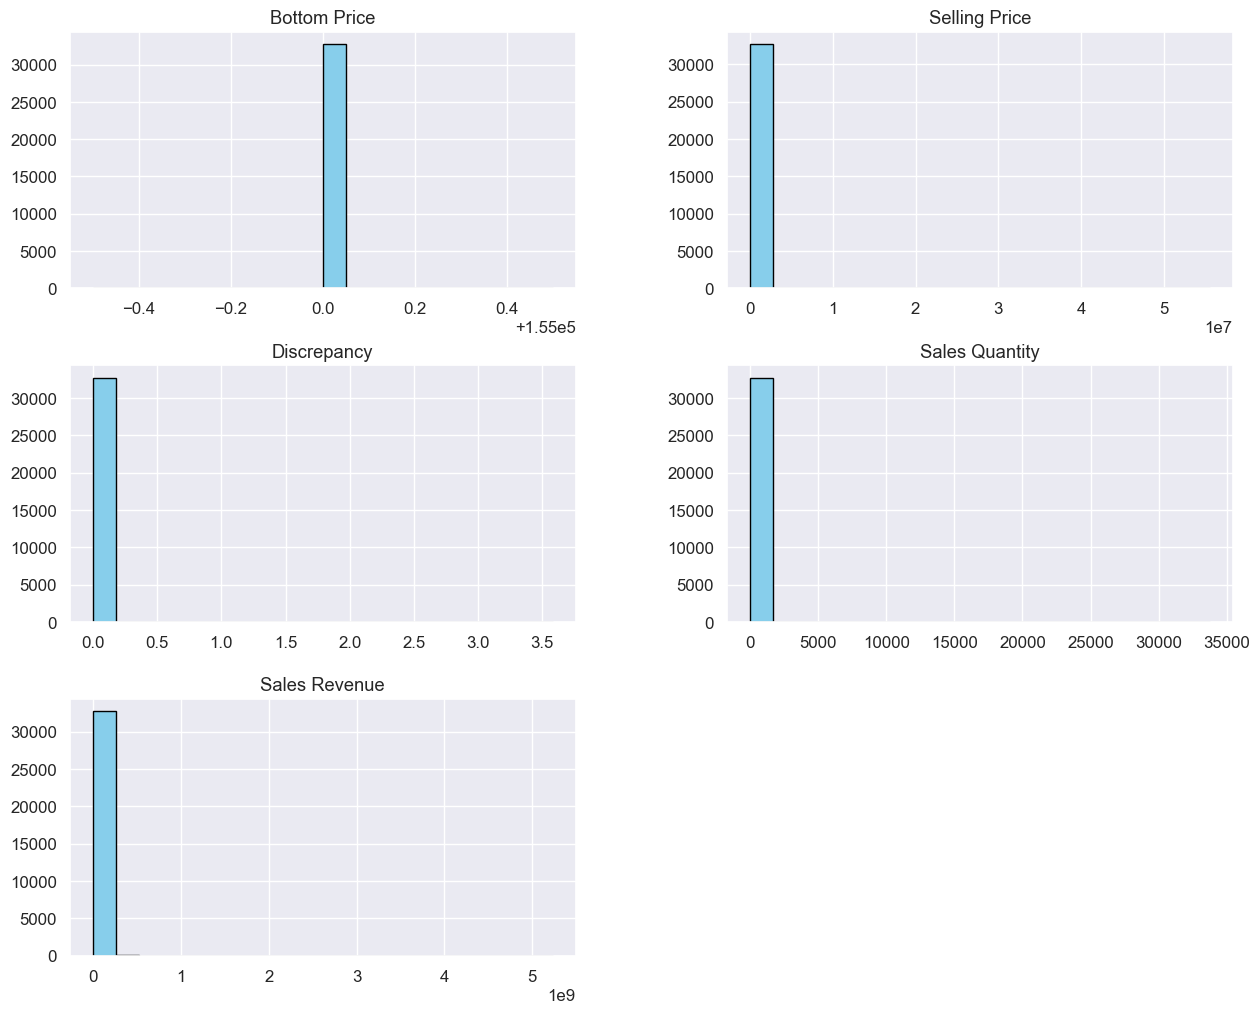

In [145]:
num = df.select_dtypes(include='number')
num.hist(bins=20, color='skyblue', edgecolor='black', figsize=(15, 12))
plt.show()

Text(0.5, 1.0, 'Persebaran Column Merchant')

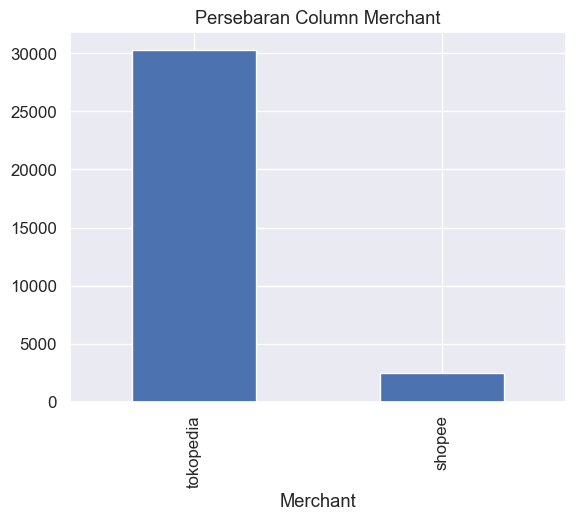

In [146]:
df['Merchant'].value_counts().plot(kind='bar').set_title("Persebaran Column Merchant")

In [147]:
df['Item Condition'].value_counts()

Item Condition
baru    32772
Name: count, dtype: int64

In [148]:
df['Stock'].value_counts(normalize=True) * 100

Stock
In Stock        99.987794
Out Of Stock     0.012206
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Status ketersediaan Barang')

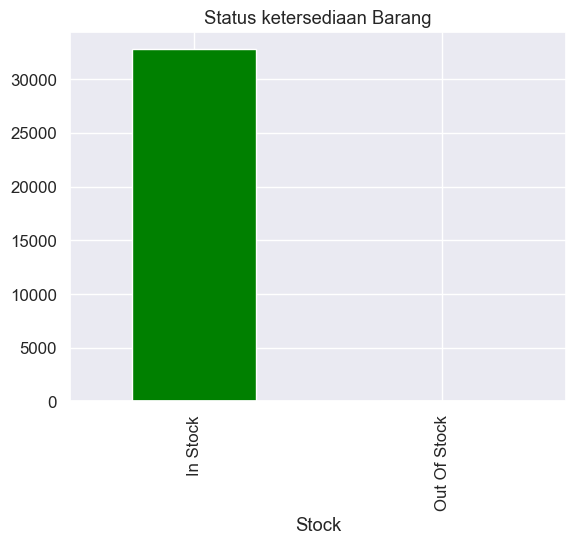

In [149]:
df['Stock'].value_counts().plot(kind='bar', color='green').set_title("Status ketersediaan Barang")

### B2. Bivariate Analysis

In [150]:
df['Week'] = df['Date'].dt.dayofweek

In [151]:
df.columns

Index(['Date', 'Last Crawling', 'SKU Name', 'Product Name', 'Url Product',
       'Seller', 'Merchant', 'Stock', 'Item Condition', 'Filter', 'Flag',
       'Bottom Price', 'Original Price', 'Discount', 'Selling Price',
       'Discrepancy', 'Sales Quantity', 'Sales Revenue', 'Week'],
      dtype='object')

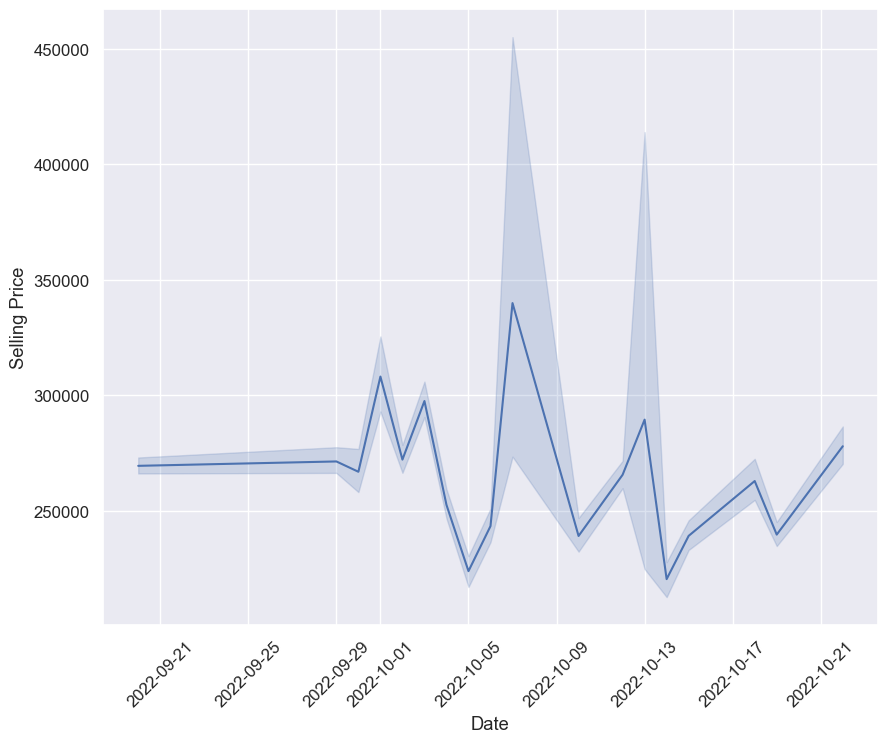

In [152]:
plt.figure(figsize=(10, 8))
sns.lineplot(df, x='Date', y='Selling Price')
plt.xticks(rotation=45)
plt.show()

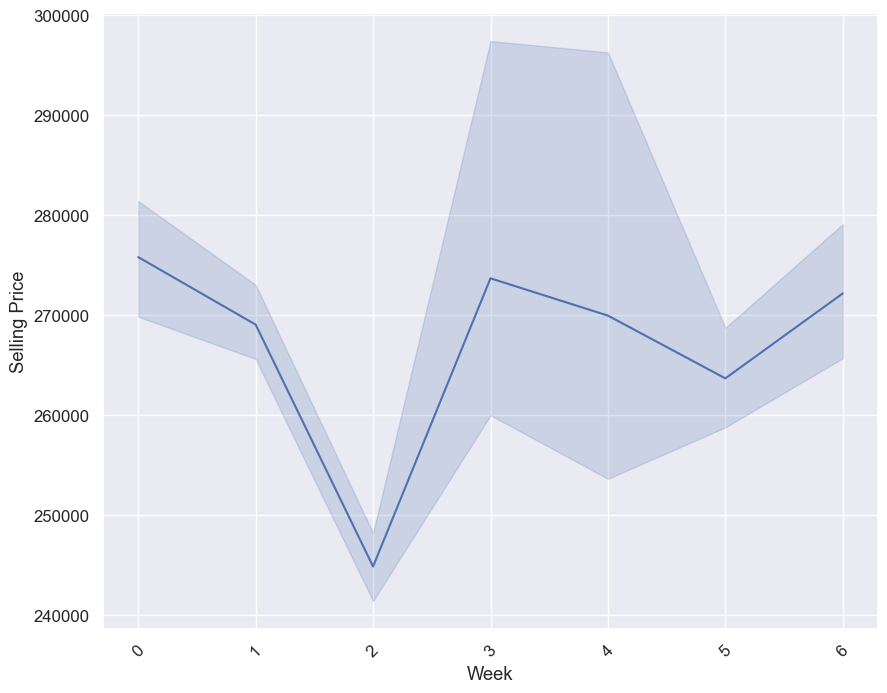

In [153]:
plt.figure(figsize=(10, 8))
sns.lineplot(df, x='Week', y='Selling Price')
plt.xticks(rotation=45)
plt.show()

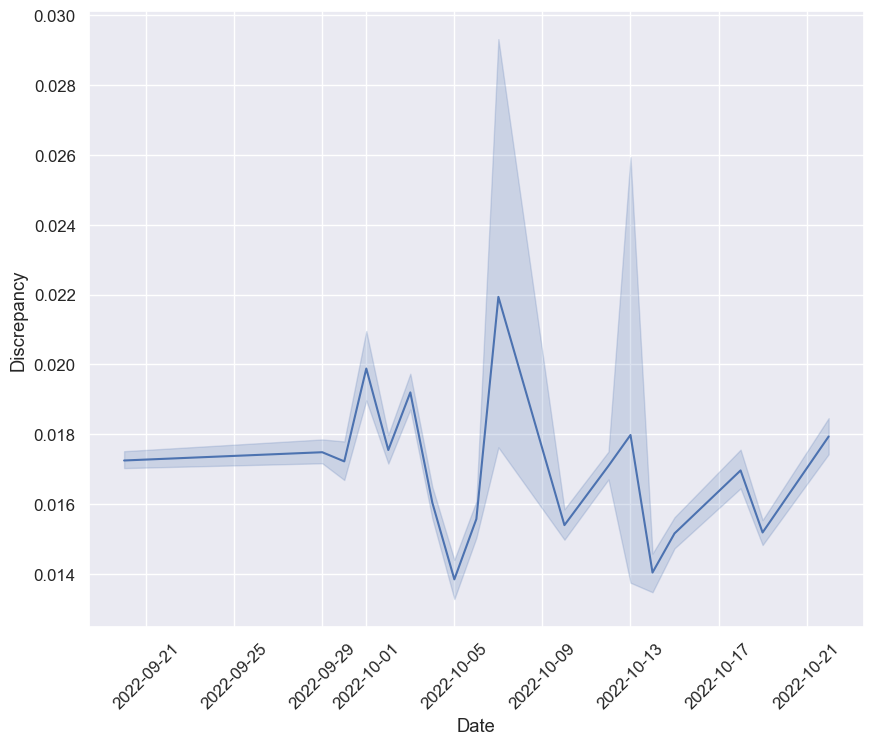

In [154]:
plt.figure(figsize=(10, 8))
sns.lineplot(df, x='Date', y='Discrepancy')
plt.xticks(rotation=45)
plt.show()

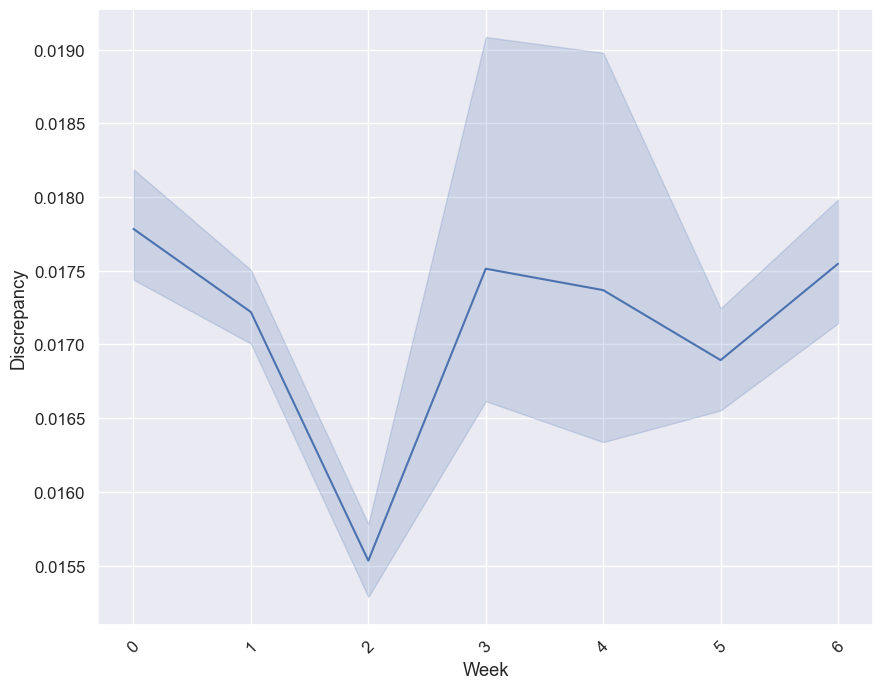

In [155]:
plt.figure(figsize=(10, 8))
sns.lineplot(df, x='Week', y='Discrepancy')
plt.xticks(rotation=45)
plt.show()

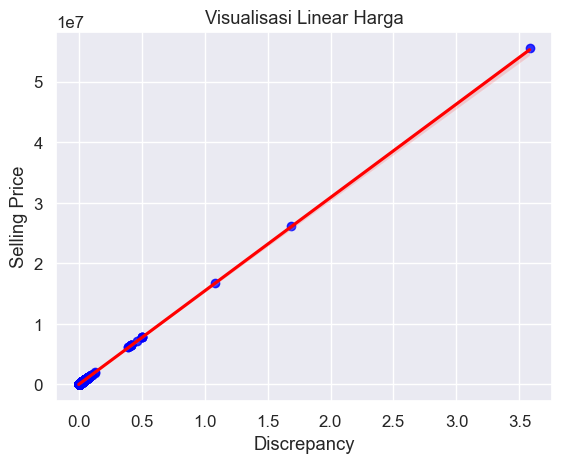

In [156]:
sns.regplot(df, x='Discrepancy', y='Selling Price', color='blue', line_kws={'color' : 'red'})
plt.title("Visualisasi Linear Harga")
plt.xlabel("Discrepancy")
plt.ylabel("Selling Price")
plt.show()

### B.3 Multivariate Analysis

In [157]:
# sns.pairplot(df, hue='Selling Price')

<Axes: >

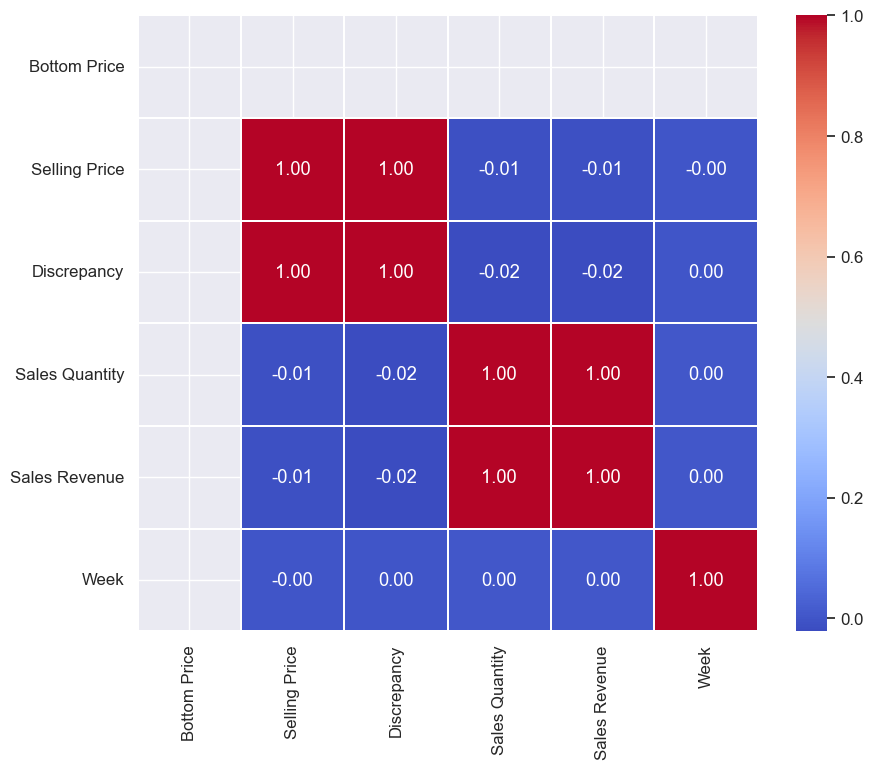

In [158]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=1.1, fmt='.2f')

## Insight Exploratory Data Analysis

### Univariate Analysis:
    1. Nilai Kolom 'Bottom Price', 'Selling Price','Discrepancy', 'Sales Quantity', 'Sales Revenue' tersebar di nilai 0 (nol)
    2. Mayoritas produk diambil dari platform merchant "Tokopedia"
    3. Kondisi semua produk yang dijual masih baru
    4. Stok Produk hampir 100% In Stock (Hampir selalu ada)

### Bivariate Analysis:
    1. Harga Jual Barang menurun drastis pada tanggal 5 Oktober dan 13 Oktober 2022
    2. Harga Jual Barang meningkat drastis pada tanggal 7 Oktober 2022
    3. Perbedaan Harga Jual Barang menurun drastis pada tanggal 5 Oktober dan 13 Oktober 2022
    4. Perbedaan Harga Jual Barang meningkat drastis pada tanggal 7 Oktober 2022
    5. Hubungan Antara Harga Jual Barang dengan Perbedaan Harga Jual Barang sangat linear

### Multivariate Analysis:
    1. Hubungan Antara Harga Jual Barang dengan Perbedaan Harga Jual Barang sangat berkorelasi
    2. Hubungan Antara Harga Jual Barang dengan fitur lainnya tidak memiliki korelasi

## D. Modelling

### D.1 Normalisasi Data (Tidak Berpengaruh)

In [159]:
feature = df['Discrepancy']
target = df['Selling Price']

feature_norm = (feature - feature.min()) / (feature.max() - feature.min())

df_norm = pd.concat([feature_norm, target], axis=1)

In [160]:
df_norm.columns

Index(['Discrepancy', 'Selling Price'], dtype='object')

### D.2 Pisah Variabel Feature dan Target (X & y)

In [161]:
X_data = df[['Discrepancy']].values
y_data = df[['Selling Price']].values

### D.3 Tambah Bias di X data

In [162]:
ones = np.ones((len(X_data), 1))
X_matrix = np.concatenate((ones, X_data), axis=1)

### D.4 Splitting Data Train dan Data Test (80:20)

In [ ]:
np.random.seed(42)
indicies = np.random.permutation(len(X_matrix))

test_size = int(len(X_matrix) * 0.8)

train_idx = indicies[:test_size]
test_idx = indicies[test_size:]

X_train, X_test = X_matrix[train_idx], X_matrix[test_idx]
y_train, y_test = y_data[train_idx], y_data[test_idx]

### D.5 Menghitung Rumus Theta

In [164]:
theta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

y_pred_test = X_test @ theta
y_pred_train = X_train @ theta

### D.6 Hasil Modelling

In [165]:
intercept = theta[0][0]
slope = theta[1][0]

print("======= Hasil Modelling =======")
print(f"Intercept (Harga Awal): {intercept:.2f}")
print(f"Slope (Perbedaan Harga): {slope:.2f}")
print(f"Rumus Selling Price: y = ({slope:.2f} * Perbedaan Harga) + {intercept:.2f}")

======= Hasil Modelling =======
Intercept (Harga Awal): 3154.58
Slope (Perbedaan Harga): 15448382.13
Rumus Selling Price: y = (15448382.13 * Perbedaan Harga) + 3154.58


### D.7 Visualisasi Hasil Regresi

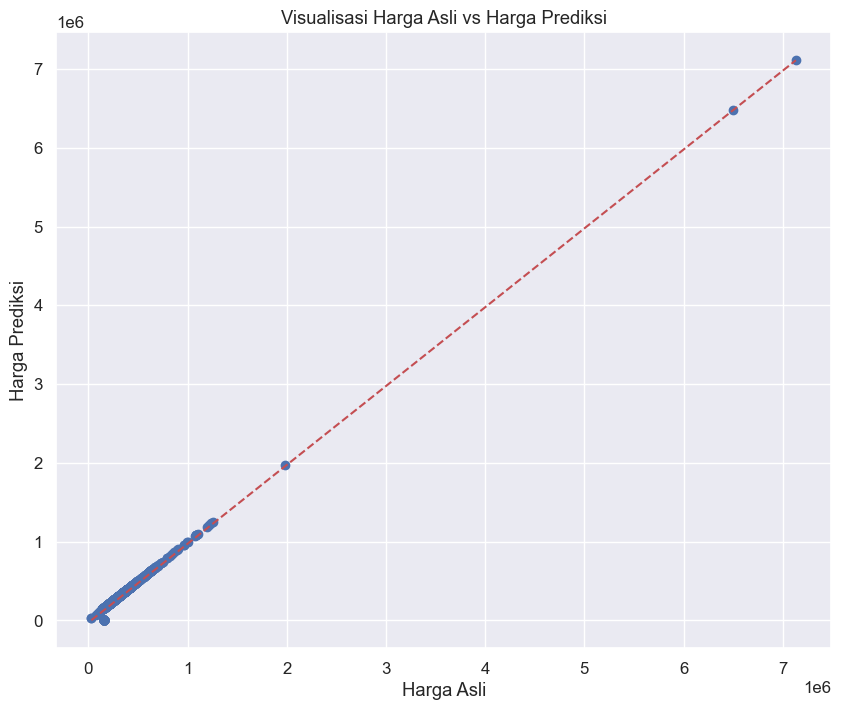

In [166]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_pred_test.min(), y_pred_test.max()], 'r--')

plt.title("Visualisasi Harga Asli vs Harga Prediksi")
plt.xlabel("Harga Asli")
plt.ylabel("Harga Prediksi")
plt.show()

## E. Evaluasi

### E.1 Menghitung Error Prediksi
Penjelasan: Harga Asli - Prediksi

In [167]:
error_test = y_test - y_pred_test
error_train = y_train - y_pred_train

### E.2 Menghitung MSE (Mean Squared Error)
- Penjelasan: Error Dikuadratkan
- Hasil = 1.8 Trilliun
- Kesimpulan: Jadi selisih harga atau error yang kuadratkan berjumlah 1.8 Trilliun

In [168]:
mse = np.sum(error_test ** 2)
print(f"{mse:.2f}")

1856489800252.57


### E.3 Menghitung MAE (Mean Absolute Error)
- Penjelasan: Error Absolut
- Hasil = 26.8 Juta
- Kesimpulan: Jadi selisih harga atau error yang absolut berjumlah 26.8 Juta

In [169]:
mae = np.sum(abs(error_test))
print(f"{mae:.2f}")

26823635.31


### E.4 Menghitung RMSE (Root Mean Squared Error)
- Penjelasan: Akar Dari MSE (Error Kuadrat)
- Hasil = 1.3 Juta
- Kesimpulan: Jadi Akar Dari MSE (Error Kuadrat) berjumlah 1.3 Juta

In [170]:
rmse = np.sqrt(mse)
print(f"{rmse:.2f}")

1362530.66


### E.5 Menghitung R2-Score/R-Squared (Akurasi)
- Penjelasan: 
    - SS Residual = Kuadrat dari Error Test
    - SS Total = Kuadrat dari Error Data Rata-Rata 
- Hasil = 98.6 %
- Kesimpulan: Jadi Akurasi dari model Simple Linear Regression ini adalah 98.6%

In [183]:
ss_residual = np.sum(error_test ** 2)
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
r2_score = 1 - ss_residual / ss_total
print(f"{r2_score:.3f}")

0.986


## F. Graphical User Interface (GUI)

### F.1 Fungsi Prediksi Data Baru

In [172]:
intercept = theta[0][0]
slope = theta[1][0]

print("======= Hasil Modelling =======")
print(f"Intercept (Harga Awal): {intercept:.2f}")
print(f"Slope (Perbedaan Harga): {slope:.2f}")
print(f"Rumus Selling Price: y = ({slope:.2f} * Perbedaan Harga) + {intercept:.2f}")

======= Hasil Modelling =======
Intercept (Harga Awal): 3154.58
Slope (Perbedaan Harga): 15448382.13
Rumus Selling Price: y = (15448382.13 * Perbedaan Harga) + 3154.58


### F.2 GUI Tkinter

In [173]:
import tkinter as tk
from tkinter import *
from tkinter import messagebox

# RUMUS y = mx + c
intercept = theta[0][0]
slope = theta[1][0]

def prediksi():
    try:
        input_mentah = input_discrepancy.get()
        if not input_mentah:
            messagebox.showwarning("Peringatan", "Mohon isi nilai Discrepancy terlebih dahulu!")
            return
            
        input_user = float(input_mentah)
        
        hasil = (slope * input_user) + intercept

        hasil_format = f"Rp {hasil:,.0f}".replace(",", ".")
        
        hasil_prediksi.config(text=hasil_format, fg='#2ecc71')
        status_label.config(text="Prediksi Berhasil!", fg="green")
        
    except ValueError:
        messagebox.showerror("Error", "Input harus berupa angka valid!")
        input_discrepancy.delete(0, tk.END)

def reset():
    input_discrepancy.delete(0, tk.END)
    hasil_prediksi.config(text="Rp -", font=("Segoe UI", 24, "bold"), bg='white', fg='#95a5a6')
    status_label.config(text="Siap memprediksi...", fg="gray")

# GUI UTAMA
root = tk.Tk()
root.title("AI Price Predictor - TP-LINK")
root.geometry("500x600")
root.configure(bg='#f0f2f5')

# HEADER
header_frame = Frame(root, bg='#34495e', pady=20)
header_frame.pack(fill='x')

Label(header_frame, text="TP-LINK PRICE PREDICTOR", 
      font=("Segoe UI", 18, "bold"), bg='#34495e', fg='white').pack()
Label(header_frame, text="Model: Simple Linear Regression", 
      font=("Segoe UI", 10), bg='#34495e', fg='#bdc3c7').pack()

# MAIN CONTENT
main_frame = Frame(root, bg='#ffffff', padx=30, pady=30, relief='raised', bd=1)
main_frame.pack(pady=30, padx=20, fill='both', expand=True)

Label(main_frame, text="Produk SKU: TL-WR840N", 
      font=("Segoe UI", 12, "bold"), bg='white', fg='#2c3e50').pack(pady=(0, 20))

Label(main_frame, text="Masukkan Nilai Discrepancy (Target Margin):", 
      font=("Segoe UI", 10), bg='white', fg='#7f8c8d').pack(anchor='w')

input_discrepancy = Entry(main_frame, font=("Segoe UI", 14), bg='#ecf0f1', fg='#2c3e50', 
                          relief='flat', justify='center')
input_discrepancy.pack(pady=10, ipady=8, fill='x')

# BUTTON PREDIKSI
btn_frame = Frame(main_frame, bg='white')
btn_frame.pack(pady=20)

btn_predict = Button(btn_frame, text="PREDIKSI HARGA", command=prediksi, 
                     font=("Segoe UI", 11, "bold"), bg='#3498db', fg='white', 
                     activebackground='#2980b9', activeforeground='white',
                     relief='flat', padx=20, pady=5)
btn_predict.pack(side='left', padx=5)

btn_reset = Button(btn_frame, text="RESET", command=reset, 
                   font=("Segoe UI", 11, "bold"), bg='#e74c3c', fg='white', 
                   activebackground='#c0392b', activeforeground='white',
                   relief='flat', padx=20, pady=5)
btn_reset.pack(side='right', padx=5)

# HASIL PREDIKSI
Label(main_frame, text="Prediksi Estimasi Harga Jual:", 
      font=("Segoe UI", 10), bg='white', fg='#7f8c8d').pack(pady=(20, 5))

hasil_prediksi = Label(main_frame, text="Rp -", 
                       font=("Segoe UI", 24, "bold"), bg='white', fg='#95a5a6')
hasil_prediksi.pack()

# Status Bar (Footer)
status_label = Label(root, text="Siap memprediksi...", bd=1, relief='sunken', bg='#ecf0f1', fg='gray')
status_label.pack(side='bottom', fill='x')

root.mainloop()